# Brain tumor detection using VGG16
---

In [1]:
import os
import matplotlib.pyplot as plt

os.environ['CUDA_VISIBLE_DEVICES'] = '-1'  # Disable GPU usage for TensorFlow

# TensorFlow and Keras imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dropout, Dense, BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Local module imports
from src.load_data import *
from src.img_processing import *
from src.convert import *
from src.img_processing import process_folder_for_cropping, check_folder_cropping_quality


2024-02-21 15:14:49.851704: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-21 15:14:49.851753: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-21 15:14:49.852680: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-21 15:14:49.859873: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-21 15:14:50.619467: W tensorflow/compiler/tf2

In [2]:
# Configure image size by pixels
height = 224 #(px)
width = 224 #(px)

train_path_raw_yes = "data/train/yes/"
train_path_raw_no = "data/train/no/"

train_path_yes= "processed_data/train/yes/" # output folder for train data
train_path_no = "processed_data/train/no/" # output folder for train data

train_path = "processed_data/train" # output folder for train data

test_path_raw_yes = "data/test/yes/"
test_path_raw_no = "data/test/no/"

test_path_yes = "processed_data/test/yes/" # output folder for test data
test_path_no = "processed_data/test/no/" # output folder for test data

test_path = "processed_data/test/" # output folder for test data

val_path_raw_yes = "data/val/yes/"
val_path_raw_no = "data/val/no/"   

val_path_yes = "processed_data/val/yes/" # output folder for val data
val_path_no = "processed_data/val/no/" # output folder for val data

val_path = "processed_data/val" # output folder for val data



In [3]:
process_folder_for_cropping(train_path_raw_yes, train_path_yes, width, height)
process_folder_for_cropping(train_path_raw_no, train_path_no, width, height)

process_folder_for_cropping(test_path_raw_yes, test_path_yes, width, height)
process_folder_for_cropping(test_path_raw_no, test_path_no, width, height) 

process_folder_for_cropping(val_path_raw_yes, val_path_yes, width, height)
process_folder_for_cropping(val_path_raw_no, val_path_no, width, height)

Processed and saved: data/train/yes/Y55.jpg
Processed Y55.jpg
Processed and saved: data/train/yes/Y101.jpg
Processed Y101.jpg
Processed and saved: data/train/yes/Y38.jpg
Processed Y38.jpg
Processed and saved: data/train/yes/Y69.jpg
Processed Y69.jpg
Processed and saved: data/train/yes/Y180.jpg
Processed Y180.jpg
Processed and saved: data/train/yes/Y194.jpg
Processed Y194.jpg
Processed and saved: data/train/yes/Y37.jpg
Processed Y37.jpg
Processed and saved: data/train/yes/Y12.jpg
Processed Y12.jpg
Processed and saved: data/train/yes/Y77.jpg
Processed Y77.jpg
Processed and saved: data/train/yes/Y74.jpg
Processed Y74.jpg
Processed and saved: data/train/yes/Y24.jpg
Processed Y24.jpg
Processed and saved: data/train/yes/Y79.jpg
Processed Y79.jpg
Processed and saved: data/train/yes/Y82.jpg
Processed Y82.jpg
Processed and saved: data/train/yes/Y15.jpg
Processed Y15.jpg
Processed and saved: data/train/yes/Y181.jpg
Processed Y181.jpg
Processed and saved: data/train/yes/Y7.jpg
Processed Y7.jpg
Pr

Processed and saved: data/train/yes/Y27.jpg
Processed Y27.jpg
Processed and saved: data/train/yes/Y35.jpg
Processed Y35.jpg
Processed and saved: data/train/yes/Y188.jpg
Processed Y188.jpg
Processed and saved: data/train/yes/Y46.jpg
Processed Y46.jpg
Processed and saved: data/train/yes/Y107.jpg
Processed Y107.jpg
Processed and saved: data/train/yes/Y39.jpg
Processed Y39.jpg
Processed and saved: data/train/yes/Y169.jpg
Processed Y169.jpg
Processed and saved: data/train/yes/Y103.jpg
Processed Y103.jpg
Processed and saved: data/train/yes/Y104.jpg
Processed Y104.jpg
Processed and saved: data/train/yes/Y26.jpg
Processed Y26.jpg
Processed and saved: data/train/yes/Y62.jpg
Processed Y62.jpg
Processed and saved: data/train/yes/Y186.jpg
Processed Y186.jpg
Processed and saved: data/train/yes/Y102.jpg
Processed Y102.jpg
Processed and saved: data/train/yes/Y29.jpg
Processed Y29.jpg
Processed and saved: data/train/yes/Y154.jpg
Processed Y154.jpg
Processed and saved: data/train/yes/Y42.jpg
Processed 

In [4]:
test_path = "processed_data/test/"  # Adjusted path for processed data
images, labels = load_data(test_path)

print("Total number of images loaded:", len(images))
print("Total number of labels loaded:", len(labels))


Total number of images loaded: 89
Total number of labels loaded: 89


Nombre total d'images chargées : 89


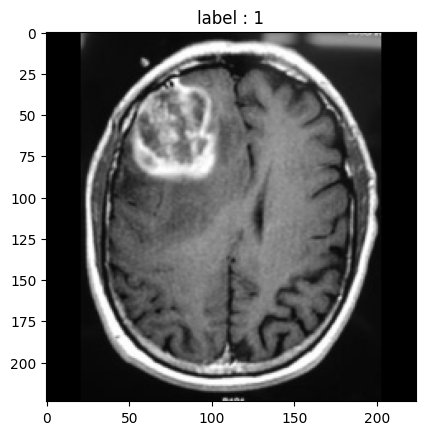

In [5]:
load_data(test_path)
plt.imshow(images[12])
plt.title(f"label : {labels[12]}")

print("Nombre total d'images chargées :", len(images))
# print("Nombre total de labels chargés :", len(labels))

In [6]:
# Charger les données de test
test_images, test_labels = load_data(test_path)

In [7]:
base_model = VGG16(include_top=False, input_shape=(224, 224, 3))

NUM_CLASSES = 1

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation='sigmoid'))

# Figer les poids du modèle VGG16
model.layers[0].trainable = False

# Compiler le modèle
model.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(learning_rate=1e-4),
    metrics=['accuracy']
)

# Afficher la structure du modèle
model.summary()

# Créer un générateur d'images pour la data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.05,
    height_shift_range=0.05,
    rescale=1./255,
    shear_range=0.05,
    brightness_range=[0.1, 1.5],
    horizontal_flip=True,
    vertical_flip=True
)

# Ajuster le générateur aux données d'entraînement
datagen.fit(images)

# Entraîner le modèle avec l'augmentation de données
model.fit(datagen.flow(images, labels, batch_size=32),
          epochs=10,
          steps_per_epoch=len(images) // 32,
          validation_data=(test_images, test_labels))

# Évaluer le modèle sur les données de test
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

2024-02-21 15:14:55.988906: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dropout (Dropout)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 1)                 25089     
                                                                 
Total params: 14739777 (56.23 MB)
Trainable params: 25089 (98.00 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________
Epoch 1/10
2/2 [==============================] - 17s 13s/step - loss: 0.5881 - accuracy: 0.7656 - val_loss: 0.4804 - val_accuracy: 0.8090
Epoc